<a href="https://colab.research.google.com/github/Azmain-Elahi/Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# setup - import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# configure matplotlib for slightly nicer default plots
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.grid'] = True


In [2]:
#Load the california Housing dataset

california = fetch_california_housing(as_frame=True)
df = california.frame.copy()
print(df.shape)
df.head(10)
#

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


Feature Descriptions:

1. MedInc: Median income of households in the block (measured in tens of thousands of US dollars).

2. HouseAge: Median age of the houses in the block (in years).

3. AveRooms: Average number of rooms per household in the block.

4. AveBedrms: Average number of bedrooms per household in the block.

5. Population: Total number of people living in the block.

6. AveOccup: Average number of occupants per household in the block.

7. Latitude: Geographic latitude of the block; higher values indicate farther north.

8. Longitude: Geographic longitude of the block; higher values indicate farther west.

9. MedHouseVal: Median house value for households in the block (in US dollars).

In [3]:
#basic information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
#Define target and feature columns

target_col = 'MedHouseVal'
feature_cols = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup']

X = df[feature_cols]
y = df[target_col]
#

X.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269


In [6]:
#Check shapes of X and y

print('Shape of X: ',X.shape) #(number_of_rows,number_of_features
print('Shape of y: ',y.shape)#(number_of_rows)

Shape of X:  (20640, 6)
Shape of y:  (20640,)


correlation matrix: 
               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             MedHouseVal  
MedInc          0.688075  
HouseAge        0.105623  
AveRooms        0.151948  
AveBedrms      -0.046701  
Population     -0.024650  
AveOccup       -0.023737  
MedHouseVal     1.000000  


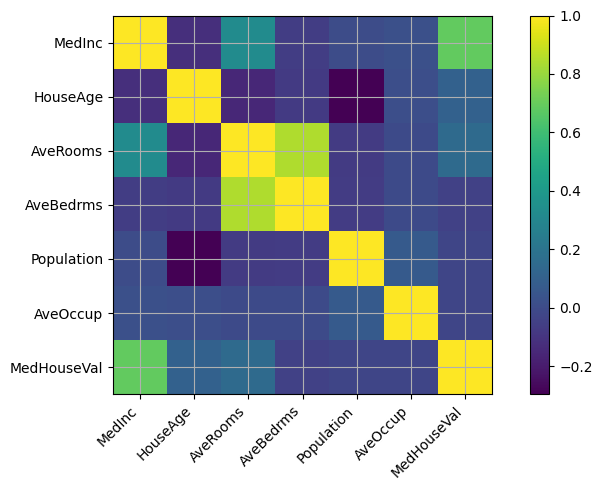

In [7]:
#simple correlation matrix between seleted features and the target

corr_matrix = df[feature_cols + [target_col]].corr()
print("correlation matrix: ")
print(corr_matrix)

#plot correlation matrix using matplotlib
fig, ax = plt.subplots()

cax = ax.imshow(corr_matrix.values,interpolation='nearest')
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.index)))
ax.set_xticklabels(corr_matrix.columns,rotation = 45,ha='right')
ax.set_yticklabels(corr_matrix.index)

fig.colorbar(cax)
plt.tight_layout()
plt.show()

#

In [8]:
#step 1:train test split
X_train,X_test,y_train,y_test = train_test_split(
     X,y,test_size=0.2,random_state=42
 )
print("Trining set size:",X_train.shape[0],"rows")
print("Testing set size:",X_test.shape[0],"rows")

Trining set size: 16512 rows
Testing set size: 4128 rows


In [9]:
#step 2: Create and fit the Linear regression model
lin_reg = LinearRegression()

#.fit() learns the best coefficents from tne training data
lin_reg.fit(X_train,y_train)
print('model fitted successfully')

model fitted successfully


In [10]:
#step 3: Inspect learned parameters(coefficients and intercept)
print('Intercept(bias term): ',lin_reg.intercept_)
print('\nCoefficients: ')
for feature_name, coef in zip(feature_cols,lin_reg.coef_):
  print(f'{feature_name}:{coef}')

Intercept(bias term):  -0.5528727644615126

Coefficients: 
MedInc:0.5461607791074247
HouseAge:0.016787909062568093
AveRooms:-0.2239199440047988
AveBedrms:1.1154926114808392
Population:2.3167197368202663e-05
AveOccup:-0.004618231345406933


In [12]:
#step 4: make predictions on training and test sets
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

print("some sample predictions on test set(first 5 rows): ")
print("Predicted: ",y_test_pred[:5])
print("Actual: ",y_test.values[:5])

some sample predictions on test set(first 5 rows): 
Predicted:  [1.00100537 1.56005635 2.67713262 2.64763331 1.98229968]
Actual:  [0.477   0.458   5.00001 2.186   2.78   ]


Ei khane precdiction hoiche but ota valo hoi ni model valo vabe learn korte pari ni


In [18]:
#Define a helper funtion to print evaluation metrics

def regression_metrics(y_true,y_pred, label = 'Model'):
  mae =  mean_absolute_error(y_true,y_pred)
  mse = mean_squared_error(y_true,y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true,y_pred)

  print(f'==={label}====')
  print(f'MAE: {mae:}')
  print(f'MSE: {mse:}')
  print(f'RMSE: {rmse:}')
  print(f'R2: {r2:}')
  print('----------------------------')

#evaluate on train
regression_metrics(y_train,y_train_pred,label = 'Lniear Regression (Train)')
regression_metrics(y_test,y_test_pred,label = 'Lniear Regression (Test)')


===Lniear Regression (Train)====
MAE: 0.5708698051066727
MSE: 0.6070093832609208
RMSE: 0.7791080690513484
R2: 0.5459161602818385
----------------------------
===Lniear Regression (Test)====
MAE: 0.579214066545444
MSE: 0.642187231453487
RMSE: 0.8013658536857475
R2: 0.5099337366296416
----------------------------


===Lniear Regression (Train)====
MAE: 0.5708698051066727
MSE: 0.6070093832609208
RMSE: 0.7791080690513484
R2: 0.5459161602818385
----------------------------
===Lniear Regression (Test)====
MAE: 0.579214066545444
MSE: 0.642187231453487
RMSE: 0.8013658536857475
R2: 0.5099337366296416
----------------------------
In colusion,ei khane error high amra jani joto 0 er kacha kachi jaite parbe toto valo . aber r^2 o valo value diteche na. amr jani (r^2 0.75) up hoile better.test set o se aro kharap korteche . kharap korar reason holo amra to linar reggration kortechi. Liner regration complex relationship identify korte pare na.
ei jonno complex data set e linear regration use na kora valo na .

For batter result:
ei jonno amra polynomial, random forest etc ei gula use kori.

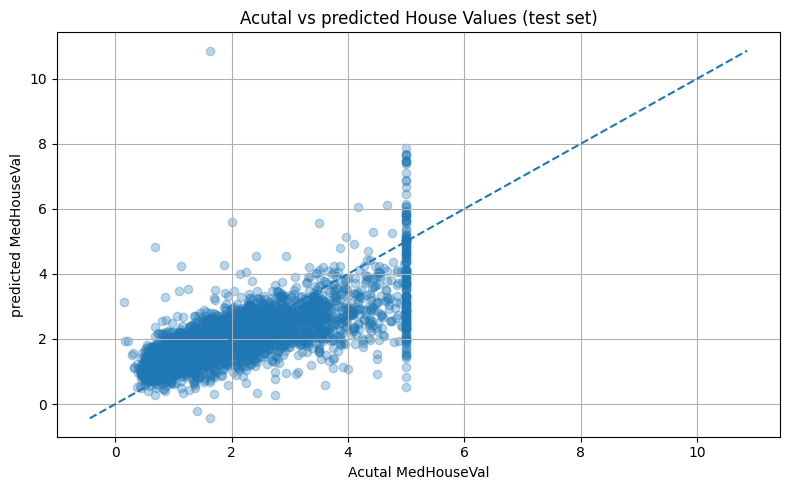

In [19]:
#step 6: plot prediction vs actual values on the test set

plt.figure()
plt.scatter(y_test,y_test_pred,alpha=0.3)
plt.xlabel('Acutal MedHouseVal')
plt.ylabel('predicted MedHouseVal')
plt.title('Acutal vs predicted House Values (test set)')
#diagonal reference line
min_val = min(y_test.min(),y_test_pred.min())
max_val = max(y_test.max(),y_test_pred.max())
plt.plot([min_val,max_val],[min_val,max_val],linestyle = '--')
plt.tight_layout()
plt.show()
#



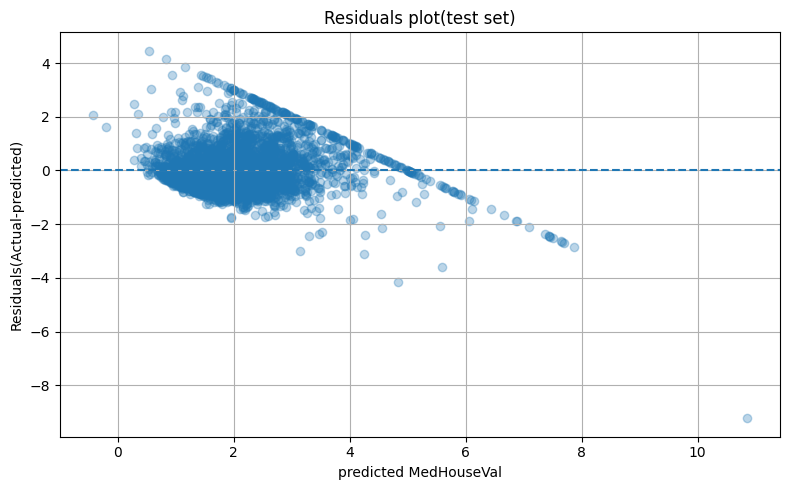

In [21]:
#residual plot (error = actual-predicted )

residuals = y_test - y_test_pred

plt.figure()

plt.scatter(y_test_pred,residuals,alpha = 0.3)
plt.axhline(0,linestyle = '--')
plt.xlabel('predicted MedHouseVal')
plt.ylabel('Residuals(Actual-predicted)')
plt.title('Residuals plot(test set)')
plt.tight_layout()
plt.show()
#

residulas= actual - predicted
1. Residulas = 0 -->perfect predection
2. Residulas > 0 -->model predicted too low
3. Residulas < 0 --> model predicted too high